In [5]:
## Importig the required packages
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.select import Select
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
driver=webdriver.Chrome(ChromeDriverManager().install())
wait = WebDriverWait(driver,15)
a=driver.get('https://www.instagram.com/')


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/keshavkumar/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


# Logging in to Instagram

In [6]:
# 1. logging into instagram

def login(usname,passwd):
    
    username = driver.find_element_by_name("username")
    password = driver.find_element_by_name("password")
    
    username.send_keys(usname)
    password.send_keys(passwd)
    enter = driver.find_element_by_xpath("//button[contains(@class,'sqdOP')]/div")
    enter.click()
    
    #Not saving the info
    
    not_now = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'cmbtv')]/button")))
    not_now.click()
    
    
    #Blocking notification popup
    noti_block=wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='mt3GC']/button[2]")))
    noti_block.click()
    
login("SAMPLE_USERNAME","SAMPLE_PASSWORD")

# 1.1 Finding top 5 handles of food from first 10 on basis of followers

In [7]:
import numpy as np
def correct(number_of_followers):
        
    a = number_of_followers.split(',')
    ans = '0'
    for i in a:
        ans += i
    else:
        return int(ans)

def searching_Opening(profile_name):
    search = wait.until(EC.presence_of_element_located((By.XPATH,"//input[contains(@class,'XTCLo')]")))
    search.clear()
    search.send_keys(profile_name)
    profile = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//a[contains(@class,'-qQT3')]")))
    #print(profile)
    for i in profile:
        if i.get_attribute("href").split('/')[-2] == profile_name:
            i.click()
            break
    return
#searching_openin('delhi_street_food1')
N=0
def insta_handles(name):
    names = []
    followers = []
    search = driver.find_element_by_xpath("//input[contains(@class,'XTCLo')]")
    search.clear()
    search.send_keys(name)
    time.sleep(2)
    food_handles = driver.find_elements_by_xpath("//a[contains(@class,'-qQT3')]")
    for i in range(10):
        names.append(food_handles[i].get_attribute("href").split("/")[-2])
    print(names)    
    for i in names:
        searching_Opening(i)
        try:
            number_of_followers = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//span[contains(@class,'g47SY ')]")))[1]
            n_o_f = correct(number_of_followers.get_attribute("title"))
            followers.append(n_o_f)
            driver.back()
        except:
            followers.append(N)
    names = np.array(names)
    followers = np.array(followers)
    index = np.argsort(followers)
    names = names[index]
    followers = followers[index]
    print("Top 5 food instagram handles with maximum number of followers:")
    for i in range(-1,-6,-1):
        print(names[i],followers[i])
    return names[-1:-6:-1],followers[-1:-6:-1]
names, followers = insta_handles("food")

['yourfoodlab', 'dilsefoodie', 'foodtalkindia', 'patna_food_meter', 'food', 'kanpurfoodexplorers', 'delhifoodguide', 'food', 'street_food_chandigarh', 'delhifoodwalks']
Top 5 food instagram handles with maximum number of followers:
yourfoodlab 1594981
dilsefoodie 742726
foodtalkindia 304192
delhifoodwalks 138742
delhifoodguide 102848


# 1.2 Finding the number of posts these handles have done in previous 3 days

In [9]:
def number_of_posts(names, followers):
    
    d = {}
    
    for i in names:
        searching_Opening(i)
        number_of_posts = 0 
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_9AhH0")))
        post.click()
        time.sleep(1)
        time2 = driver.find_element_by_xpath("//time[contains(@class,'_1o9PC')]")
        date = time2.text.split()
        while True:
            if  date[1] == "DAYS" and int(date[0]) > 3 :
                break
            elif date[1] not in ["MINUTES","HOURS","DAY","DAYS","HOUR"]:
                break
            else:
                number_of_posts += 1
                next_button = driver.find_element_by_link_text("Next")
                next_button.click()
                time2 = wait.until(EC.presence_of_element_located((By.XPATH,"//time[contains(@class,'_1o9PC')]")))
                date = time2.text.split()
                
        
        d[i] = number_of_posts
        close = driver.find_element_by_xpath('//div[contains(@class , "_2dDPU")]/div[3]/button')
        close.click()
                
    print("Number of posts in the last 3 days are: ") 
    for i in d:
        print(i,d[i])
    
    return d.values() 

num = number_of_posts(names, followers)  
number_of_posts = np.array(num)

posts = np.array(list(num))
posts = posts*10

Number of posts in the last 3 days are: 
yourfoodlab 6
dilsefoodie 4
foodtalkindia 3
delhifoodwalks 4
delhifoodguide 0


# 1.3 Depicting information using graph...

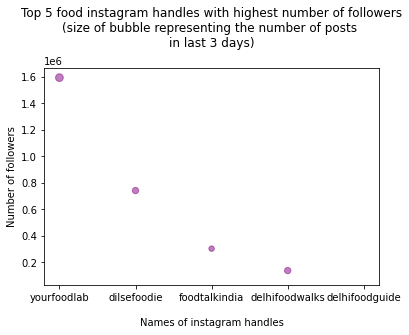

In [10]:
import matplotlib.pyplot as plt
def plot(names,followers,posts):
    plt.scatter(names,followers,sizes = posts,color ="purple",alpha = 0.5 )
    plt.ylabel("Number of followers")
    plt.xlabel("\nNames of instagram handles")
    plt.title("Top 5 food instagram handles with highest number of followers\n(size of bubble representing the number of posts \nin last 3 days)\n")
    plt.show()
plot(names,followers,posts)

# 2.1 Scraping the content of first 10 posts of top 5 handles...

In [11]:
def scrape(names):
    d = {}
    for i in names:
        d[i] = []
    for i in names:
        searching_Opening(i)
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_9AhH0")))
        post.click()
        for j in range(2):
            t = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='C4VMK']/span")))
            d[i].append(t.text)
            next_button = driver.find_element_by_link_text("Next")
            next_button.click()
        
        close = driver.find_element_by_xpath('//div[contains(@class , "_2dDPU")]/div[3]/button')
        close.click() 
    return d
scraped_content = scrape(names)

In [12]:
scraped_content

{'yourfoodlab': ['Chocolate Cake Shake by Chef @sanjyotkeer\nBeat the heat with this delicious Chocolate Cake Shake! #YFLQuickies #reelitfeelit #reelsinstagram #reelsvideo #recipeoftheday #recipereels',
  'What’s up guys! New video is up on the YouTube & Facebook channel! This burger recipe will change your veg burger experience. This is one of my favorites, I get asked a lot that how do we make junk healthier and I love to prep up recipes like these. One of the main elements of a burger is the patty and usually in a veg burger we usually turn towards potatoes, this recipe has a high protein rajma patty which not only is healthy but is super delicious. I have prepped up some delicious mango salsa with it along with a garlic dip and some charred onions. This burger will surely blow your mind once you try it! Cheers!\n.\n.\n.\n#recipe #burger #burgerlove #burgertime #burgerlover #vegburger #vegrecipesofindia #vegetarian #rajma #burgers #sanjyotkeer #yourfoodlab'],
 'dilsefoodie': ['Halwa

# 2.2 Calculating frequency of each word on scraped content....

In [13]:
d = {}
for i in scraped_content:
    for j in scraped_content[i]:
        words = j.split()
        for k in words:
            d[k] = d.get(k,0) + 1
d

{'Chocolate': 2,
 'Cake': 2,
 'Shake': 1,
 'by': 2,
 'Chef': 1,
 '@sanjyotkeer': 1,
 'Beat': 1,
 'the': 22,
 'heat': 1,
 'with': 8,
 'this': 3,
 'delicious': 3,
 'Shake!': 1,
 '#YFLQuickies': 1,
 '#reelitfeelit': 1,
 '#reelsinstagram': 1,
 '#reelsvideo': 1,
 '#recipeoftheday': 1,
 '#recipereels': 1,
 'What’s': 1,
 'up': 5,
 'guys!': 1,
 'New': 2,
 'video': 1,
 'is': 11,
 'on': 5,
 'YouTube': 3,
 '&': 1,
 'Facebook': 1,
 'channel!': 1,
 'This': 5,
 'burger': 5,
 'recipe': 2,
 'will': 4,
 'change': 1,
 'your': 3,
 'veg': 2,
 'experience.': 1,
 'one': 1,
 'of': 17,
 'my': 1,
 'favorites,': 1,
 'I': 3,
 'get': 1,
 'asked': 1,
 'a': 8,
 'lot': 1,
 'that': 2,
 'how': 1,
 'do': 2,
 'we': 3,
 'make': 1,
 'junk': 1,
 'healthier': 1,
 'and': 10,
 'love': 1,
 'to': 6,
 'prep': 1,
 'recipes': 1,
 'like': 3,
 'these.': 1,
 'One': 1,
 'main': 1,
 'elements': 1,
 'patty': 2,
 'usually': 2,
 'in': 7,
 'turn': 1,
 'towards': 1,
 'potatoes,': 1,
 'has': 1,
 'high': 1,
 'protein': 1,
 'rajma': 1,
 'which

# 2.3 Saving data of words and frequencies in csv

In [16]:
import pandas as pd
words = np.array(list(d.keys()))
frequency = np.array(list(d.values()))
index = np.argsort(frequency)
words = words[index]
frequency = frequency[index]
df = pd.DataFrame(words)
df[1] = frequency
df.columns = ["words","frequency"]
df.to_csv("DEMO_FILE_NAME_location")

# 2.4 Finding most popular hashtags....

In [17]:
hashtags = {}
for i in d:
    if i[0] == "#":
        hashtags[i] = d[i]
h = np.array(list(hashtags.keys()))
f = np.array(list(hashtags.values()))
i = np.argsort(f)
h = h[i]
f = f[i]
print("Top occuring hashtags and their frequency: ")
for i in range(-1,-6,-1):
    print(h[i],f[i])

Top occuring hashtags and their frequency: 
#DFWinBikaner 2
#walkwithanubhav 2
#Bikanerstreetfood 2
#TravelforFood 2
#FoodWalks 2


# 2.5 Plotting pie chart of top 5 hashtags

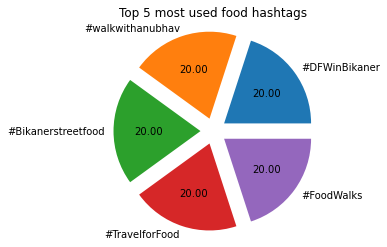

In [18]:
plt.title("Top 5 most used food hashtags")
plt.pie(f[-1:-6:-1],labels = h[-1:-6:-1],autopct="%.2f",explode = [0.15,0.15,0.15,0.15,0.15])
plt.show()

# 3.1 Finding likes of top 10 posts of 5 handles obtained earlier...This sometimes not run in one go so please run it again......

In [19]:
def go_to_handle(username,l):
    search_bar= WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"MWDvN")]/div[2]/input')))   
    search_bar.send_keys(username)
    time.sleep(2)
    driver.find_element_by_xpath('//div[@class="_01UL2"]/div/div[1]').click()
    posts= WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class,"v1Nh3 kIKUG  _bz0w")]')))
    for i in posts[:10]:
        try:
            i.click()
            n= WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/a/span')))
            likes=n.text
            likes=likes.replace(',','')
            l.append(int(likes))
            close =  WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class , "_2dDPU")]/div[3]/button')))
            close.click()
        except:
            b=WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class ,"HbPOm")]/span')))
            b.click()                                                                 
            n= WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="vJRqr"]/span')))
            likes=n.text
            likes=likes.replace(',','')
            l.append(int(likes))
            driver.find_element_by_class_name('QhbhU').click()
            close =  WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class , "_2dDPU")]/div[3]/button')))
            close.click()

In [20]:
total_likes=[]
import time
for i in names:
    l=[]
    go_to_handle(i,l)
    print(i,":",l)
    _sum=sum(l)
    total_likes.append(_sum)

yourfoodlab : [50476, 30554, 16998, 80498, 26113, 23738, 28414, 31735, 49543, 37507]
dilsefoodie : [15995, 15507, 12894, 19612, 8797, 8569, 8986, 13867, 7517, 17283]
foodtalkindia : [2953, 393, 522, 704, 571, 230, 619, 337, 497, 196]
delhifoodwalks : [351, 827, 1835, 219, 475, 920, 897, 611, 1479, 1746]
delhifoodguide : [1295, 905, 477, 906, 588, 405, 1060, 711, 1215, 910]


# 3.2 Calculating avg likes for each handle...

In [22]:
avg_likes=[]
for i in total_likes:
    avg_likes.append(i/10)

In [23]:
for i in range(5):
    print(names[i],":",avg_likes[i])

yourfoodlab : 37557.6
dilsefoodie : 12902.7
foodtalkindia : 702.2
delhifoodwalks : 936.0
delhifoodguide : 847.2


# 3.3 Dividing avg likes by number of followers of handle....

In [24]:
ratio=[]
for i in range(5):
    ratio.append((avg_likes[i])/int(followers[i]))
    print(names[i],":",ratio[i])

yourfoodlab : 0.023547365141026757
dilsefoodie : 0.01737208607211812
foodtalkindia : 0.002308410477593099
delhifoodwalks : 0.0067463349238154275
delhifoodguide : 0.008237398879900435


# 3.4 Depicting information using bar graph......

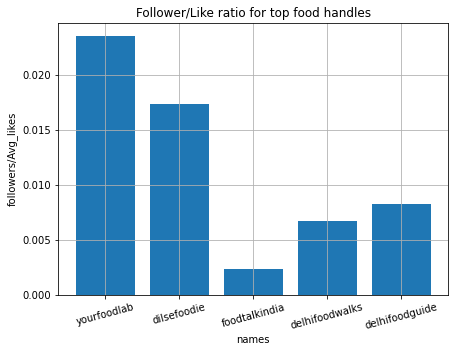

In [25]:
import matplotlib.pyplot as plt

plt.figure( figsize=(7, 5))
plt.bar(names,ratio)
plt.grid()
plt.title("Follower/Like ratio for top food handles")
plt.xlabel("names")
plt.ylabel("followers/Avg_likes")
plt.xticks(rotation=15)
plt.show()